In [462]:
# import all necessory libraries
import pandas as pd
import json as json
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sys
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
sns.set_style("darkgrid")
%matplotlib inline

### Part - 1 Exploratory Data Analysis

In [464]:
# load json data
json_file = 'data/logins.json'

data = pd.read_json(json_file)

In [465]:
data.head(10)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [466]:
data.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [467]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


###  Aggregate logins counts based on 15-minute time intervals

In [468]:
# set first index on the timestamp column
data.set_index('login_time', inplace=True)

# to aggregate each sample give count 1 
data["count"] = 1 

# aggregate dates by 15min intervals
data_15T = data.resample('15T', how='sum')


In [469]:
data_15T.head(10)

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
1970-01-01 21:15:00,4
1970-01-01 21:30:00,0
1970-01-01 21:45:00,4
1970-01-01 22:00:00,9


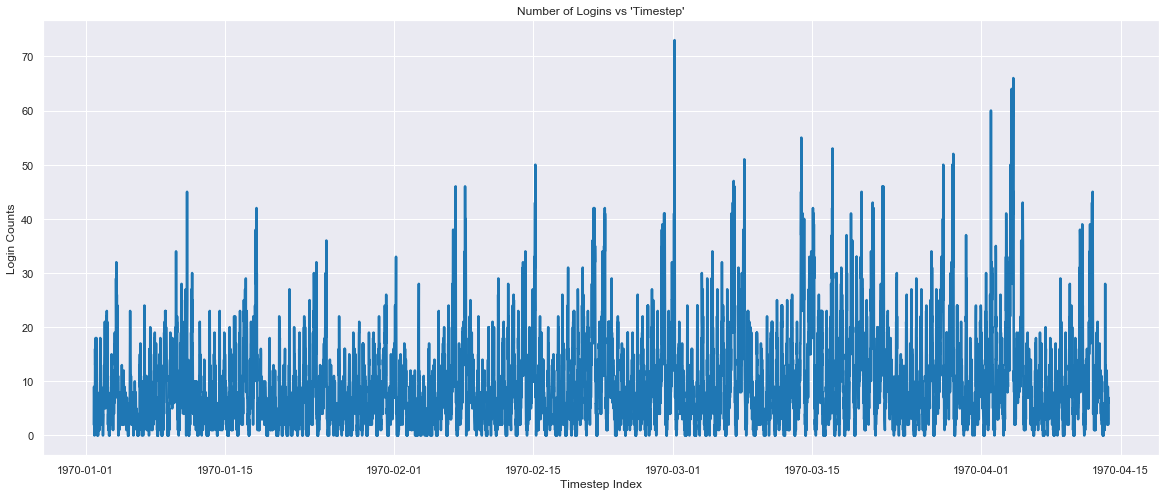

In [470]:
plt.figure(figsize=(20,8))
plt.plot(data_15T)
plt.title("Number of Logins vs 'Timestep'")
plt.xlabel("Timestep Index")
plt.ylabel("Login Counts")
plt.show()

In [471]:
# reset index 
df = data.reset_index()
data_15T = data_15T.reset_index()

In [472]:
# create new columns of date, hour and weekday
df['date'] = df['login_time'].apply(lambda date: dt.date(date.year, date.month, date.day))
df['hour'] = df['login_time'].apply(lambda h: h.hour)
df['weekday'] = df['login_time'].apply(lambda w: w.weekday())

In [473]:
df.head(10)

,login_time,count,date,hour,weekday
0,1970-01-01 20:13:18,1,1970-01-01,20,3
1,1970-01-01 20:16:10,1,1970-01-01,20,3
2,1970-01-01 20:16:37,1,1970-01-01,20,3
3,1970-01-01 20:16:36,1,1970-01-01,20,3
4,1970-01-01 20:26:21,1,1970-01-01,20,3
5,1970-01-01 20:21:41,1,1970-01-01,20,3
6,1970-01-01 20:12:16,1,1970-01-01,20,3
7,1970-01-01 20:35:47,1,1970-01-01,20,3
8,1970-01-01 20:35:38,1,1970-01-01,20,3
9,1970-01-01 20:47:52,1,1970-01-01,20,3


In [474]:
# count daily total logins and sort by date
by_date = df['date'].value_counts().sort_index()
by_date.head()

1970-01-01    112
1970-01-02    681
1970-01-03    793
1970-01-04    788
1970-01-05    459
Name: date, dtype: int64

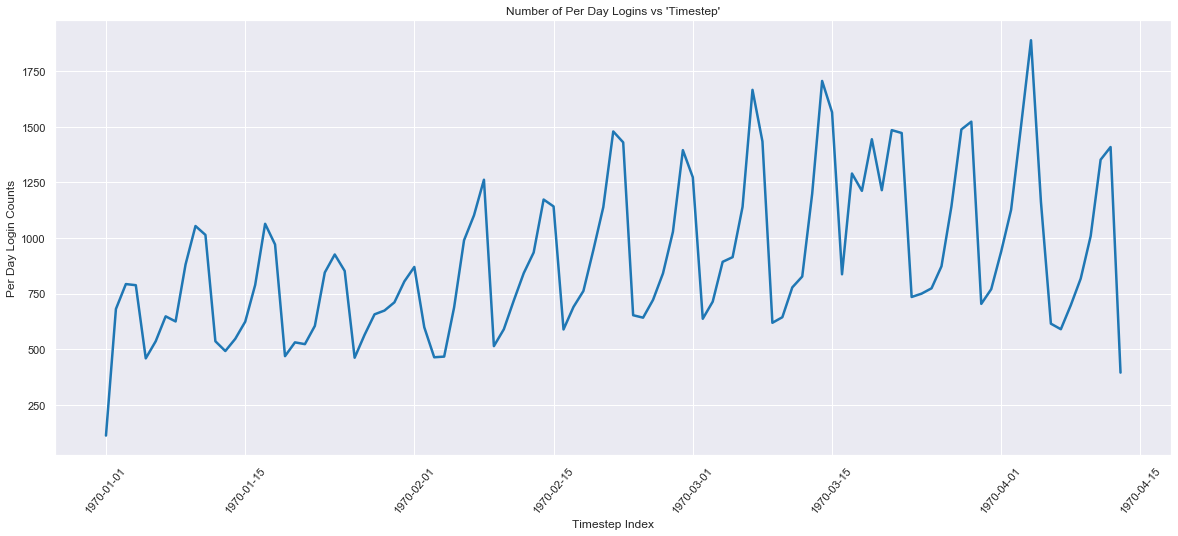

In [475]:
# plot daily login counts
plt.figure(figsize=(20,8))
plt.plot(by_date)
plt.title("Number of Per Day Logins vs 'Timestep'")
plt.xlabel("Timestep Index")
plt.xticks(rotation = 50)
plt.ylabel("Per Day Login Counts")
plt.show()

### Check Monthly Total Logins

In [476]:
login_months = data_15T.groupby(data_15T['login_time'].dt.strftime('%B'))['count'].sum().sort_values(ascending=False)
login_months

login_time
March       33723
February    24673
January     21239
April       13507
Name: count, dtype: int64

- <b>`As above, it seems march has more logins than all other months`</b>
- <b>`April month has least amount of logins.`</b>

### January Total Logins

In [477]:
january_logins = data_15T[(data_15T['login_time'] > '1970-01') & (data_15T['login_time'] < '1970-02')]
january_logins.describe()

,count
count,2896.000000
mean,7.333909
std,6.099863
min,0.000000
25%,3.000000
50%,6.000000
75%,10.000000
max,45.000000


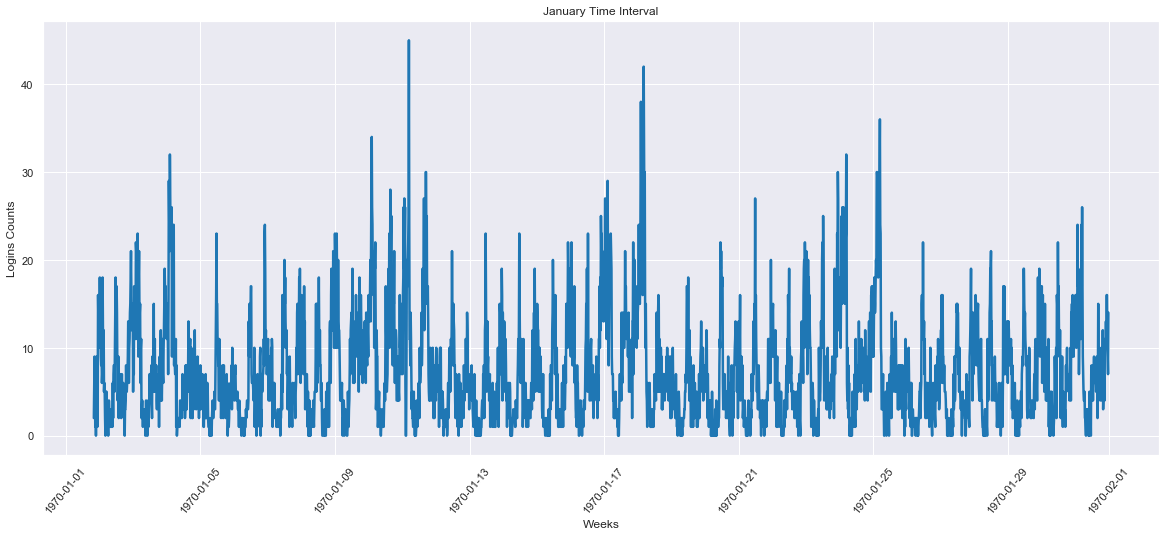

In [478]:
# plot january logins
plt.figure(figsize=(20,8))
x = january_logins['login_time']
y = january_logins['count']
plt.plot(x, y)
plt.title('January Time Interval')
plt.xticks(rotation = 50)
plt.xlabel("Weeks")
plt.ylabel("Logins Counts")
plt.show()

###  February Total Logins

In [479]:
february_logins = data_15T[(data_15T['login_time'] > '1970-02') & (data_15T['login_time'] < '1970-03')]
february_logins.describe()

,count
count,2687.000000
mean,9.177894
std,7.797917
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,50.000000


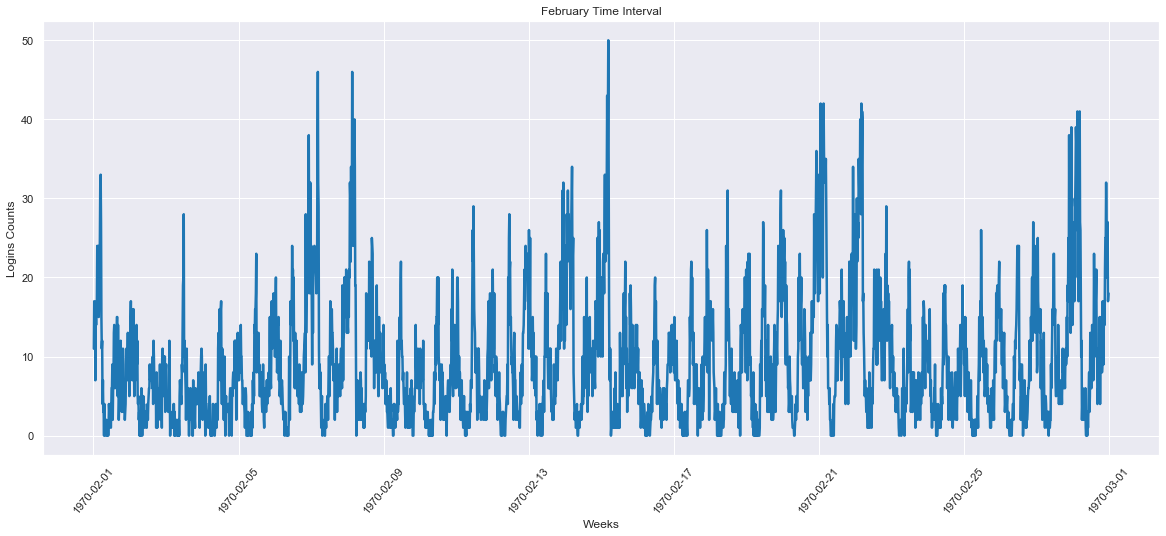

In [480]:
# plot february logins
plt.figure(figsize=(20,8))
x = february_logins['login_time']
y = february_logins['count']
plt.plot(x, y)
plt.title('February Time Interval')
plt.xticks(rotation = 50)
plt.xlabel("Weeks")
plt.ylabel("Logins Counts")
plt.show()

###  March Total Logins

In [481]:
march_logins = data_15T[(data_15T['login_time'] > '1970-03') & (data_15T['login_time'] < '1970-04')]
march_logins.describe()

,count
count,2975.000000
mean,11.330084
std,9.336997
min,0.000000
25%,4.000000
50%,9.000000
75%,16.000000
max,73.000000


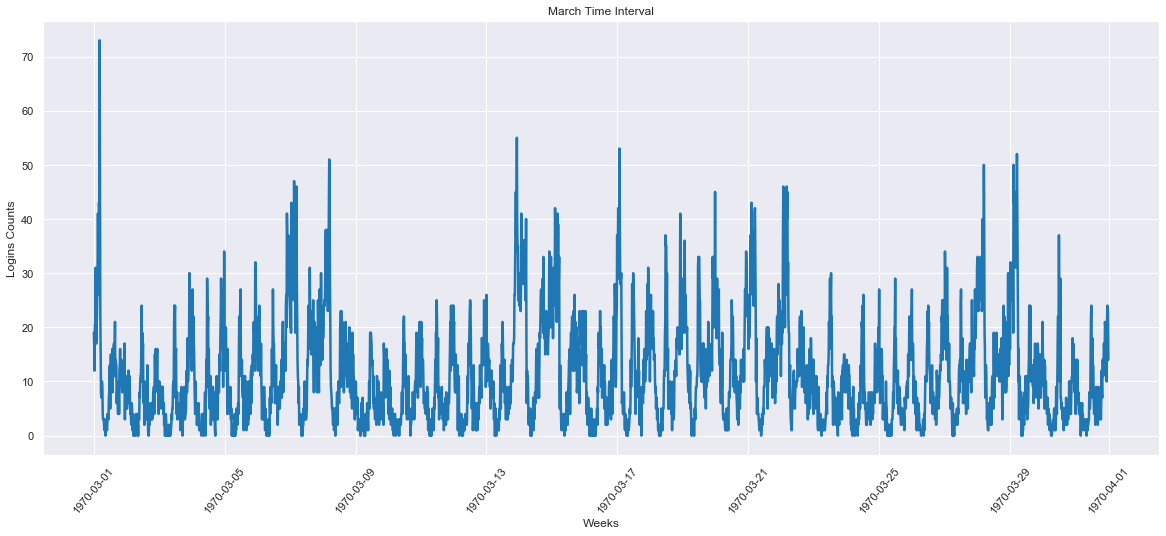

In [482]:
# plot March logins
plt.figure(figsize=(20,8))
x = march_logins['login_time']
y = march_logins['count']
plt.plot(x, y)
plt.title('March Time Interval')
plt.xticks(rotation = 50)
plt.xlabel("Weeks")
plt.ylabel("Logins Counts")
plt.show()

### April Total Logins

In [483]:
april_logins = data_15T[(data_15T['login_time'] > '1970-04')]
april_logins.describe()

,count
count,1227.000000
mean,10.995925
std,9.973251
min,0.000000
25%,4.000000
50%,8.000000
75%,15.000000
max,66.000000


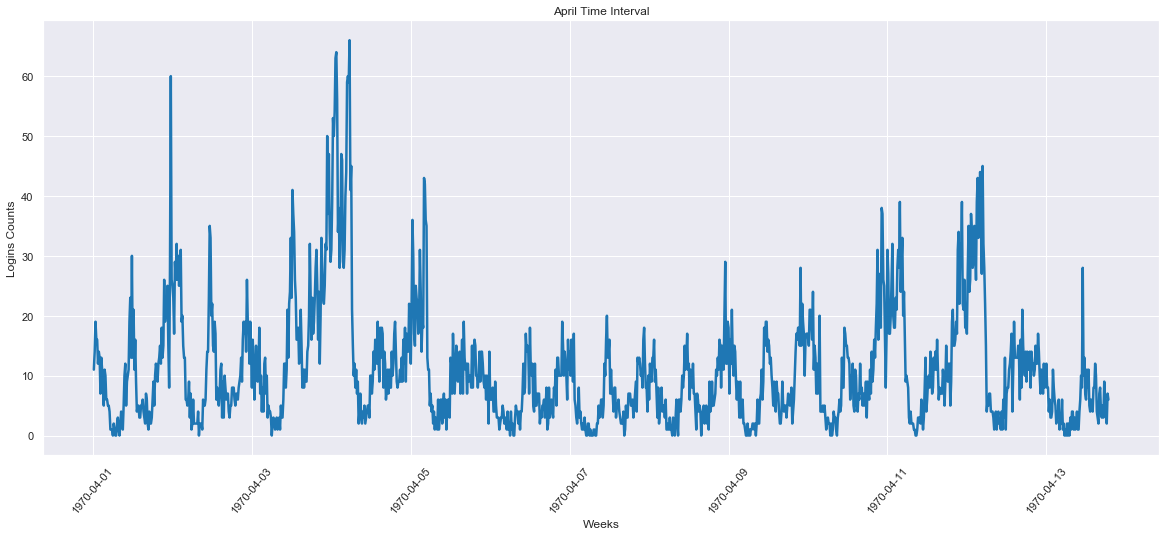

In [484]:
# plot April logins
plt.figure(figsize=(20,8))
x = april_logins['login_time']
y = april_logins['count']
plt.plot(x, y)
plt.title('April Time Interval')
plt.xticks(rotation = 50)
plt.xlabel("Weeks")
plt.ylabel("Logins Counts")
plt.show()

### Logins by Weekday

In [485]:
# Counttotal logins by each weekday Monday (index = 0) to Sunday (index = 6)
data_15T['weekday'] = data_15T['login_time'].dt.dayofweek
data_weekday = data_15T.sort_values(by='count', ascending=False)
weekday_login_counts = data_weekday[['count', 'weekday']]
weekday_login_counts = weekday_login_counts.groupby('weekday').sum().reset_index()
weekday_login_counts

,weekday,count
0,0,8823
1,1,9268
2,2,10339
3,3,11960
4,4,15208
5,5,19377
6,6,18167


In [486]:
# Replace weekday numeric values to name of week day
weekday_login_counts['weekday'] = ['Mon', 'Tues', 'Wed','Thurs','Fri', 'Sat', 'Sun']
weekday_login_counts = weekday_counts[['weekday','count']]
weekday_login_counts

,weekday,count
0,Mon,8823
1,Tues,9268
2,Wed,10339
3,Thurs,11960
4,Fri,15208
5,Sat,19377
6,Sun,18167


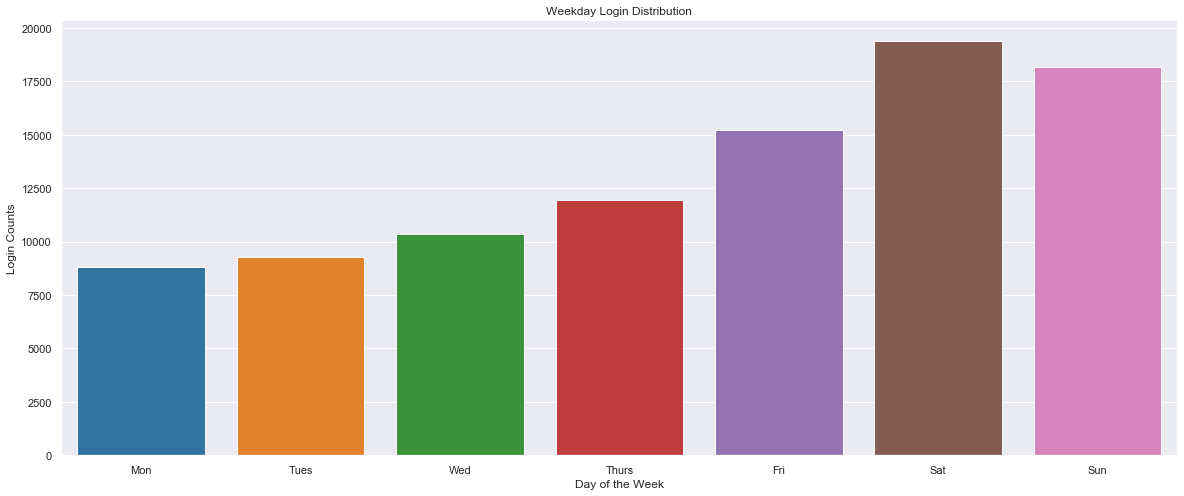

In [487]:
# plot total logins by each week day
plt.figure(figsize=(20,8))
sns.barplot(x= 'weekday', y='count', data=weekday_login_counts)
plt.xlabel('Day of the Week')
plt.title('Weekday Login Distribution')
plt.ylabel('Login Counts')
plt.show()

   <li>As days going from monday to sunday, Number of logins are increasing gradually.</li>
   <li>Most logins occur in weekends.</li>
   <li>Comparing to other days of week, saturday has maximum number of logins.</li>

### Logins by Hour

In [488]:
# Counting based on weekdays, 0 = Monday, 6 = Sunday
data_15T['hour'] = data_15T['login_time'].dt.hour
data_hour = data_15T.sort_values(by='count', ascending=False)
hour_login_counts = data_hour[['count', 'hour']]
hour_login_counts = data_hour.groupby('hour').sum().reset_index()
hour_login_counts.head()

,hour,count,weekday
0,0,5993,1236
1,1,6317,1236
2,2,5800,1236
3,3,4831,1236
4,4,5034,1236


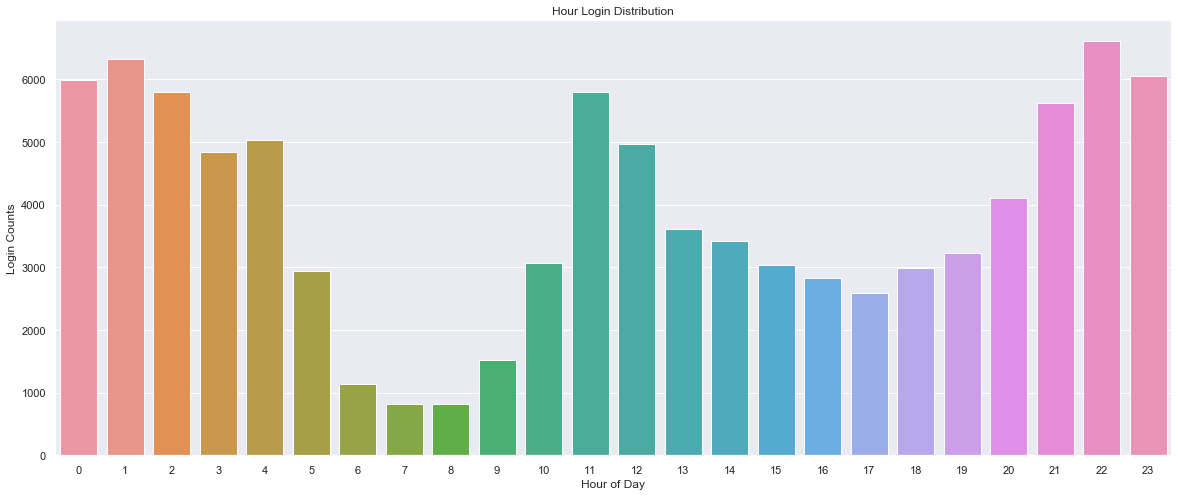

In [489]:
# plot total logins by each hour 
plt.figure(figsize=(20,8))
sns.barplot(x= 'hour', y='count', data=hour_login_counts)
plt.xlabel('Hour of Day')
plt.title('Hour Login Distribution')
plt.ylabel('Login Counts')
plt.show()

#### The peaks occurs at night, but never stretch into the 'morning'. Looking back at the full plot, we see a pretty consistent login activity for Saturday nights, corresponding to the peaks in the graph.

### Part 2 - Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

#### 1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

<li>I would you choose profit as the key measure of success of this experiment in encouraging driver partners to serve both cities.</li>

<li>Weekend engagement is better than primary weekday city engagement for Gotham and Metropolis drivers. There is a huge difference in peak times during the weekdays, so it is unlikely that any driver would take advantage of both cities as that would associate to working more than 12 hours a day. However, with weekends being active for both throughout the day, it is more reasonable to expect a driver to take customers back and forth with tolls not being an issue.</li>

<li>I believe that creating these tolls roads will hopefully increase the awareness about the benefits of driver partners. The goal is to save time and increase productivity.</li>

#### 2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
<ul><b>a. how you will implement the experiment</b></ul>
<ul><b>b. what statistical test(s) you will conduct to verify the significance of the
observation</b></ul>
<ul><b>c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.</b></ul>

<li>We can perform an A/B Test. The control group would be users that do not use the toll bridge. And the test group would be users that do use the toll bridge. We'll have to keep track of the revenue gained from both sides and compare it against each other within a few months. Or if you want a more accurate reading, we can collect the data within a year's time.</li>

<b>a.</b> I will conduct a t-test as statistical test, with a p-value of 0.5.

<b>b.</b> There's three ways to interpret the results. One would be if there's no increase in profit. If this happens, then we'll need to conduct more studies and see what's causing the problem. If there is no increase in profit, then we'll have to wait it out and see what else can be done. If there is profit, then we can look at what factors contributed the most to an increase in profit and maybe optimize from there.

<b>c.</b> In the end, it'll be hard to evaluate the performance of this experiment within a short period of time. This experiment will have to be monitored for a while and adjustments will have to be made yearly or periodically at the least.

### Part 3 - Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. 

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. 

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

### Data Description

<li><b>city:</b> city this user signed up in</li>
<li><b>phone:</b> primary device for this user</li>
<li><b>signup_date:</b> date of account registration; in the form ‘YYYYMMDD’</li>
<li><b>last_trip_date:</b> the last time this user completed a trip; in the form ‘YYYYMMDD’</li>
<li><b>avg_dist:</b> the average distance in miles per trip taken in the first 30 days after signup</li>
<li><b>avg_rating_by_driver:</b> the rider’s average rating over all of their trips</li>
<li><b>avg_rating_of_driver:</b> the rider’s average rating of their drivers over all of their trips</li>
<li><b>surge_pct:</b> the percent of trips taken with surge multiplier > 1</li>
<li><b>avg_surge:</b> The average surge multiplier over all of this user’s trips</li>
<li><b>trips_in_first_30_days:</b> the number of trips this user took in the first 30 days after signing up</li>
<li><b>ultimate_black_user:</b> TRUE if the user took an Ultimate Black in their first 30 days;
    FALSE otherwise</li>
<li><b>weekday_pct:</b> the percent of the user’s trips occurring during a weekday</li>

### Load data

In [491]:
with open('data/ultimate_data_challenge.json') as file:
    df = pd.DataFrame(json.load(file))
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [492]:
df.groupby(df['phone']).sum()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
phone,,,,,,,,
Android,29067,56148.8,16099.35,128293.9,4822.0,907376.9,89812.67,71570.8
iPhone,83894,135171.0,37224.49,311957.2,13790.0,2112704.7,197167.22,164484.2


### Exploratory Data Analysis

In [493]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [494]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


### Data Cleaning

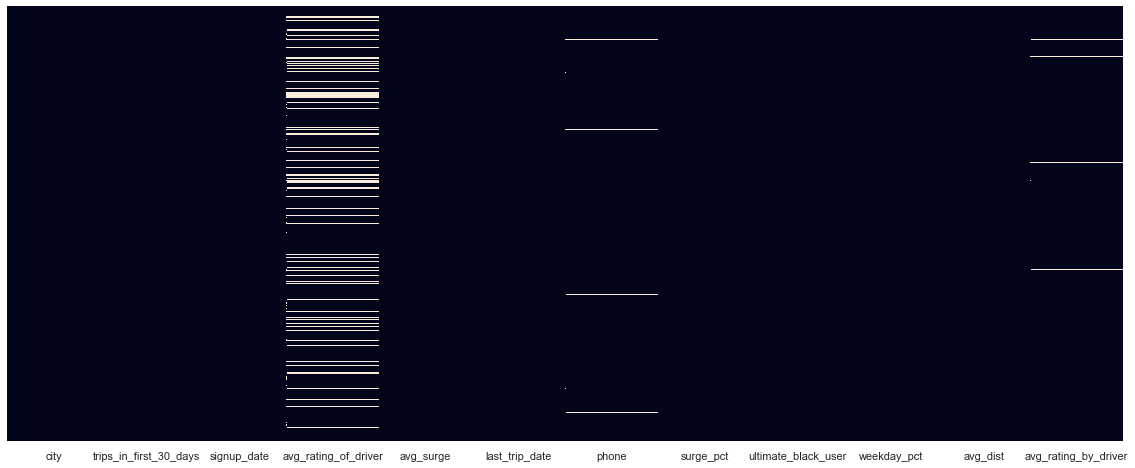

In [495]:
# plot heatmap to visualize missing values
plt.figure(figsize=(20,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)
plt.show()

- `Feature, avg_rating_of_driver, has maximum number of NaN values, and it has float data type. NaN values can be replaced with mean.`

In [402]:
print(df.shape)
print(df.isnull().sum())

(50000, 13)
city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
Retained                  0
dtype: int64


In [403]:
# Fixing null values by giving them the avg value.
df["avg_rating_of_driver"].fillna(df["avg_rating_of_driver"].mean(), inplace=True)
df["avg_rating_by_driver"].fillna(df["avg_rating_by_driver"].mean(), inplace=True)
df['phone'].fillna('iPhone',inplace=True)

In [404]:
print(df.isnull().sum())

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
Retained                  0
dtype: int64


### Data Pre-Processing

In [405]:
# Converting date columns to datetime objects
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

##### User consider as retained if they were “active” (i.e. took a trip) in the preceding 30 days.

In [406]:
# Check last trip date
df['last_trip_date'].max()

Timestamp('2014-07-01 00:00:00')

In [407]:
# Adding a retained label and set values to 0
df["Retained"] = 0
# Active users will have a value of 1 if they were active within the past 30 days
df.loc[df['last_trip_date'] >= "2014-06-01", "Retained"] = 1

In [408]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [409]:
df['Retained'].value_counts(True).mul(100).round(2).astype(str) + '%'

0    62.39%
1    37.61%
Name: Retained, dtype: object

In [410]:
corr_data = df.corr()
corr_data

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Retained
trips_in_first_30_days,1.000000,-0.011060,-0.001841,0.005720,0.112210,0.050388,-0.136329,-0.039097,0.210463
avg_rating_of_driver,-0.011060,1.000000,-0.021653,-0.003290,-0.001916,0.012587,0.028508,0.101660,-0.010829
avg_surge,-0.001841,-0.021653,1.000000,0.793582,-0.078791,-0.110071,-0.081491,0.010498,-0.003333
surge_pct,0.005720,-0.003290,0.793582,1.000000,-0.106861,-0.144918,-0.104414,0.019964,0.011797
ultimate_black_user,0.112210,-0.001916,-0.078791,-0.106861,1.000000,0.035998,0.032310,0.009328,0.205002
weekday_pct,0.050388,0.012587,-0.110071,-0.144918,0.035998,1.000000,0.101652,0.020366,0.009693
avg_dist,-0.136329,0.028508,-0.081491,-0.104414,0.032310,0.101652,1.000000,0.079793,-0.092780
avg_rating_by_driver,-0.039097,0.101660,0.010498,0.019964,0.009328,0.020366,0.079793,1.000000,-0.026748
Retained,0.210463,-0.010829,-0.003333,0.011797,0.205002,0.009693,-0.092780,-0.026748,1.000000


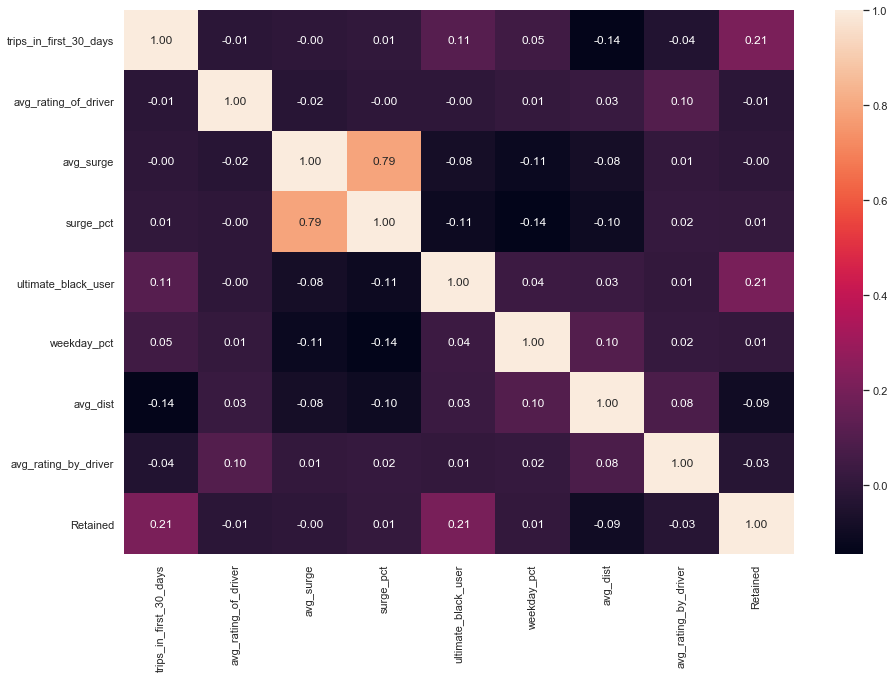

In [411]:
# plot heatmap to visualize correlation of numeric features
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.set_context("notebook",font_scale = 1.0, rc = {"lines.linewidth":2.5})
ax = sns.heatmap(corr_data, annot = True, fmt = ".2f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

<li>As above heatmap, <b>surge_pct</b> and <b>avg_surge</b> features have strong correlation with each other.

### One HotEncoding

In [412]:
# convert all categorical features to numeric 
ohe_df = pd.get_dummies(df, drop_first=True)

In [413]:
ohe_df.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Retained,city_King's Landing,city_Winterfell,phone_iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,1,1,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,0,0,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,1,1,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,0,0,1,0


In [414]:
# Drop last_trip_date and signup_date because it won't useful with model
ohe_df.drop(['last_trip_date', 'signup_date'], axis=1, inplace=True)

### Building the Model

In [415]:
# Remove target feature to train and test data
X = ohe_df.drop('Retained', axis=1)
y=ohe_df['Retained']

In [416]:
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [417]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# fit model on training data
XGB_model = XGBClassifier()
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [418]:
# make predictions of test data
y_predict = XGB_model.predict(X_test)
predictions = [round(value) for value in y_predict]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.43%


Text(0, 0.5, 'Feature Importance Score')

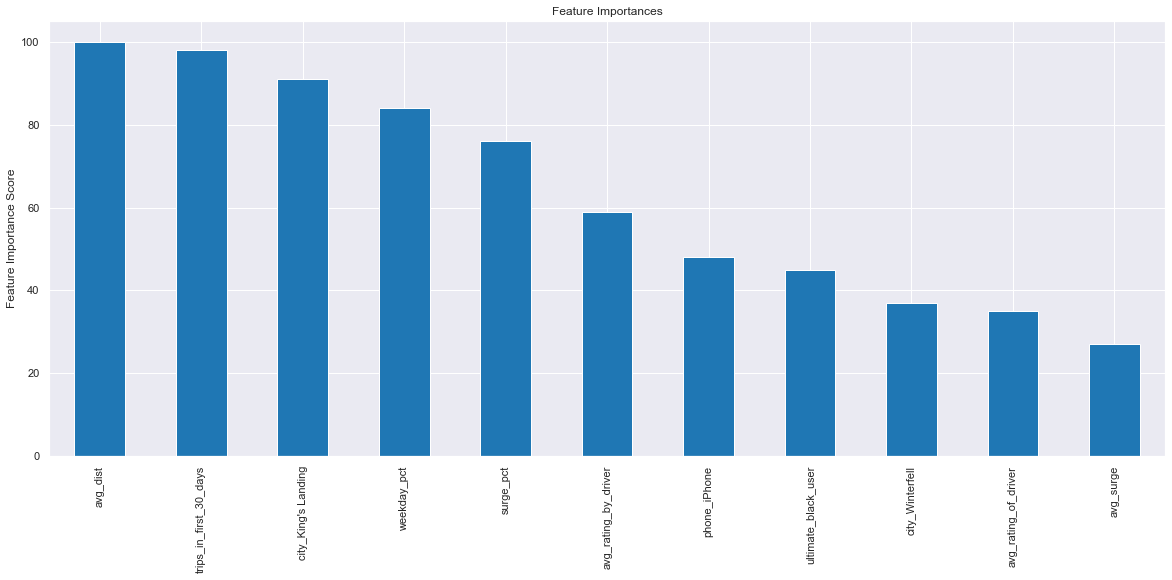

In [419]:
# plot feature importances 
plt.figure(figsize=(20,8))
feat_imp = pd.Series(XGB_model.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.86      0.79      4936
           1       0.84      0.70      0.76      5055

    accuracy                           0.78      9991
   macro avg       0.79      0.78      0.78      9991
weighted avg       0.79      0.78      0.78      9991



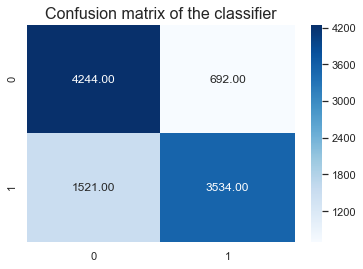

In [438]:
# Confusion Matrix Heatmap
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

cm = confusion_matrix(y_test, y_predict)
ax = sns.heatmap(cm, annot = True, fmt = ".2f",cmap=plt.cm.Blues)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion matrix of the classifier',fontsize=16)
print("Classification Report:\n", classification_report(y_test, y_predict))
plt.show()

In [445]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from scipy.stats import randint

In [450]:
param_test2 = {
 'max_depth':[80, 90, 100, 110],
 'min_child_weight':[4,5,6], 
 'learning_rate':[0.1,0.001,0.05],
 'n_estimators':[100,120,150,200]   

}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train, y_train)
gsearch2.best_params_, gsearch2.best_score_

/Users/suroor/Documents/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/suroor/Documents/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


({'learning_rate': 0.05,
  'max_depth': 80,
  'min_child_weight': 6,
  'n_estimators': 150},
 0.9038888766815377)

In [451]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# fit model on training data
XGB_model = XGBClassifier(learning_rate = 0.05,max_depth = 80, min_child_weight = 6, n_estimators = 150)
XGB_model.fit(X_train, y_train)

# make predictions of test data
y_predict = XGB_model.predict(X_test)
predictions = [round(value) for value in y_predict]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 81.29%


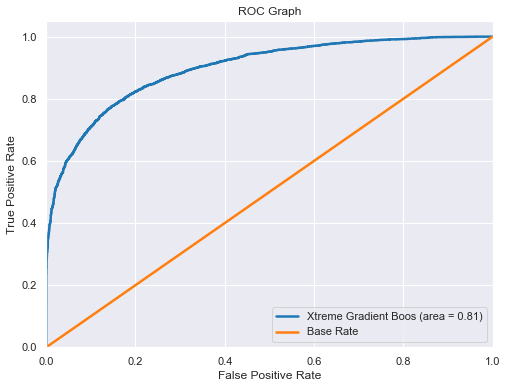

In [461]:
# Create ROC Graph
from sklearn.metrics import roc_curve, roc_auc_score

xgb_roc_auc = roc_auc_score(y_test, XGB_model.predict(X_test))
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, XGB_model.predict_proba(X_test)[:,1])

# Plot Xtreme Gradient Boost ROC
plt.figure(figsize=(8,6))
plt.plot(xgb_fpr, xgb_tpr, label='Xtreme Gradient Boos (area = %0.2f)' % xgb_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

### Conclusions

I used XGboost algorithm for my predictive model. The main concern is how active users are defined. The idea of the "sixth month" is not clear and even a shift of a few days dramatically changes the percentage of users considered active. Also, from the feature importance, we can help improve rider retention by optimizing plans on cities and phones.

King's Landing has a very high importance and we can probably look in deeper into this city to understand what makes it different from the rest. A comparison to King's Landing would be beneficial as those users are very active. It also seems that there is a better app experience for iPhone users, so improving the Android app would likely help.Phone type also plays an important role. 

We can look further into this because maybe iPhone users may have certain apps or features that Android users don't. If looking for new users, Astapor is the city to focus on as it had the worst rate.